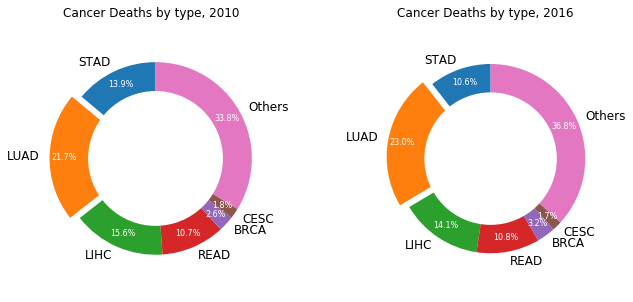

<Figure size 432x288 with 0 Axes>

In [2]:
import cv2
from matplotlib import rcParams
import matplotlib.pyplot as plt

if __name__=='__main__':
	#### 1. pie plot으로 나타낼 데이터 입력
	'''
	Reference
	암 발생 및 사망 현황 : 지표상세화면 - e-나라지표
	http://www.index.go.kr/potal/stts/idxMain/selectPoSttsIdxMainPrint.do?idx_cd=2770&board_cd=INDX_001
	'''
	labels = ['STAD', 'LUAD', 'LIHC', 'READ', 'BRCA', 'CESC', 'Others']
	titles = ['Cancer Deaths by type, 2010', 'Cancer Deaths by type, 2016']
	data   = [[10032,  15623,  11205,   7701,   1868,   1272,    24345], # 2010
	          [ 8264,  17963,  11001,   8432,   2472,   1300,    28762]] # 2016
	
	#### 2. matplotlib의 figure 및 axis 설정
	rcParams.update({'font.size': 10})
	fig, axes = plt.subplots(1,2,figsize=(10,5))
	plt.subplots_adjust(wspace=0.5) # subplot간의 너비 간격 조절
	
	#### 3. 각 subplot에 pie plot 그리기
	explode = (0, 0.1, 0, 0, 0, 0, 0) # 퍼짐 정도 조절
	for i in range(2):
		ax = axes[i] # subplot 선택
		wedges, texts, autotexts = ax.pie(data[i], explode=explode, labels=labels,
		                                  autopct='%1.1f%%', pctdistance=0.85,
		                                  shadow=False, startangle=90)
		for w in wedges: # 조각 설정
			w.set_linewidth(0)
			w.set_edgecolor('w')
			
		for t in texts: # label 설정
			t.set_color('k')
			t.set_fontsize(12)
			
		for a in autotexts: # 퍼센티지 설정
			a.set_color('w')
			a.set_fontsize(8)
		'''
		NOTE. 아래의 2줄은 파이차트를 도넛차트로 보이게끔 하는 trick임
		'''
		centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
		ax.add_artist(centre_circle)
		
		ax.set_title(titles[i])
		ax.axis('equal')
		
	#### 4. 그래프 저장하고 출력하기
	plt.savefig('ex_pieplot.png', format='png', dpi=300)
	plt.show()

plt.figure()
feedback = cv2.imread('ex_pieplot.png')

cv2.imshow('Feedback', feedback)
cv2.waitKey(0)
cv2.destroyAllWindows()